In [16]:
import math

### This could be illustrate the transformation of Pytorch

In [3]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
plt.rcParams['savefig.bbox'] = 'tight'
orig_img = Image.open(Path('/home/mahfuz/Downloads/teaher_image.jpg'))


In [7]:
# if you change the seed, make sure that randomly-applied tranforms
# properly show that the image can be both transformd and not transformed
torch.manual_seed(0)

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0, 0].set(title='Original Image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.tight_layout()



## Pad
Pad transform fills image borders with some pixel value

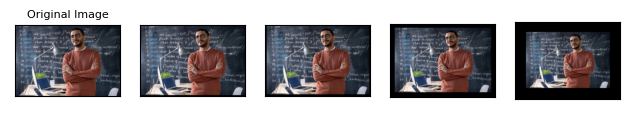

In [11]:
padded_image = [T.Pad(padding=padding)(orig_img) for padding in (5, 10, 30, 80)]
plot(padded_image)

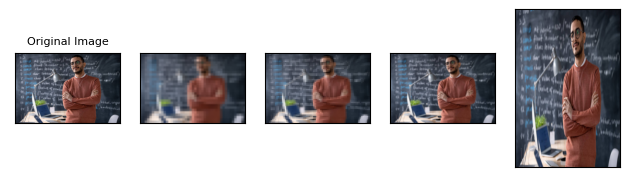

In [13]:
resized_image = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_image)

## Center Crop
The ```CenterCrop``` transform crops the given image at the center.

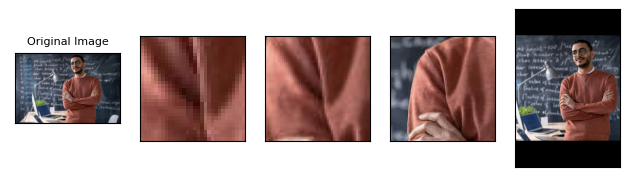

In [14]:
center_crop = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crop)

## Grapscale
The grayscale transform converts an images to grayscale

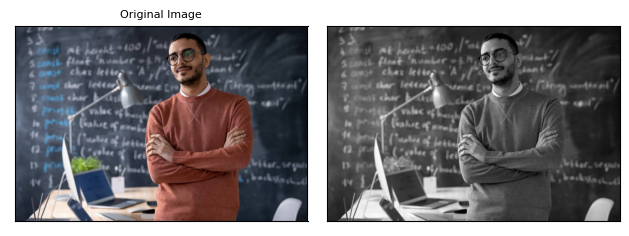

In [15]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray')

## Random transforms
the following transforms are random, which means that the same transformers instance will produce different result each time it transforms a given image

### Color Jitter

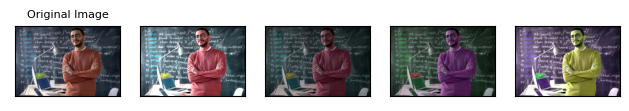

In [17]:
jitter = T.ColorJitter(brightness=0.5, hue=0.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)